# Probability Density Function

1. Using probability Density Function
2. From probability back to actual value
3. Calculate probability between 2 values

In [16]:
from __future__ import division
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

sns.set_palette(['#00A99D', '#F5CA0C', '#B6129F', '#76620C', '#095C57'])
np.version.full_version

'1.15.4'

## Data

In [5]:
#We use a fictional data set of 10000 averge number of Facebook friends.
facebook_mu = 190.0 # mu = mean
facebook_sigma = 36.0 # sigma = standard deviation
facebook_friends = np.random.normal(facebook_mu, facebook_sigma, 10000)

# show first 12 samples
facebook_friends[:12]

array([188.87033321, 170.76843724, 191.89913829, 216.17388684,
       221.95112893, 217.31515903, 213.75020423, 120.76040094,
       181.20010866, 177.22365989, 146.03745582, 184.31562222])

## Using the Probability Density Function
The total area under the Probability Density Function (pdf) is always 1.0. Roughly 68% of the values is within 1 standard deviation from the mean. About 95% falls within two standard deviations. We can determine the probability of finding a given value in the distribution by using the pdf.

Let's say someone's got 227 Facebook friends. What is the probability of having this or less number of Facebook friends?

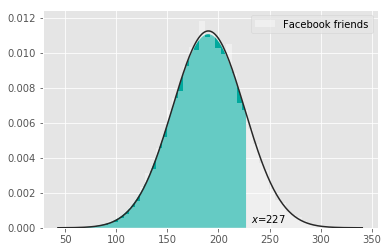

In [27]:
# First take a look at the pdf and especially the green area under
# the curve containing the probability of 227 Facebook friends or less.
x = 227

#kde optional to plot gaussian kernel density estimate
sns.distplot(facebook_friends, label = 'Facebook friends', kde=False, fit = stats.norm, color = 'w') 
plt.text(x + 5, .0003, '$x$='+str(x))

x_plot = np.linspace(min(facebook_friends), x, 1000)
y_plot =stats.norm.pdf(x_plot, facebook_mu, facebook_sigma)
plt.fill_between(x_plot, y_plot)
plt.legend()

To calculate the probability, we need the z score. All z-scores fall on the standard normal distribution, with a mean of 0 and standard deviation of 1.

$$z=\frac{x-\mu}{\sigma}$$

think of Z-score as...


In [18]:
# To calculate the probability, we need the z score.
zscore = (x - facebook_mu) / facebook_sigma
zscore

1.0277777777777777

In [19]:

# Calculate the probability by calling stats.norm.cdf
# This is a computational z table lookup
p = stats.norm.cdf(zscore)
p

0.8479728141176333

So this means the probability of people having 227 Facebook friends or less is about 85%. Since the area under the curve adds up to 1, we can say that the probability of people having a value more than 227 Facebook friends is 1- $p$.

In [20]:
# Probability of having a value more than 227
1 - p

0.15202718588236674

## From probability back to the actual value
Let's assume we have a 21% chance of having a certain number of Facebook friends or more. What is the minimum number of Facebook friends we have in this case?

That means the probability is 1 - 0.21

In [21]:
# We use the ppf function (inverse cdf) - from probability to z score
p = 1 - .21
z = stats.norm.ppf(p)
z

0.8064212470182404

In [22]:
# From z score to number of Facebook friends
x = z * facebook_sigma + facebook_mu
x

219.03116489265665

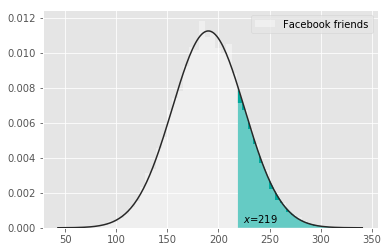

In [26]:
# The green area under the curve containing the probability 
# of (roughly) 206 Facebook friends or more.

sns.distplot(facebook_friends, label = 'Facebook friends', kde = False, fit = stats.norm, color = 'w')
plt.text(x+5, .0003, '$x$='+str(int(x)))

x_plot = np.linspace( x,max(facebook_friends), 1000)
y_plot =stats.norm.pdf(x_plot, facebook_mu, facebook_sigma)
plt.fill_between(x_plot, y_plot)
plt.legend()

## Calculate probability in between two values
What is the probability of people having between 120 and 170 Facebook friends? Thats right, figure out the area under the curve!Get the z-scores for both values then minus it :)

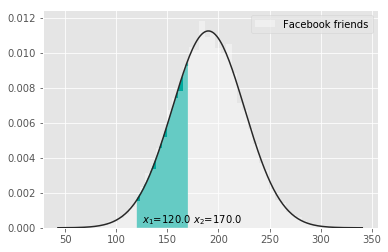

In [28]:
# We want to know the proportion of the green area under the curve.
x1 = 120.0
x2 = 170.0
sns.distplot(facebook_friends, label='Facebook friends', kde=False, 
             fit=stats.norm, color='w')
plt.text(x1+5, .0003, '$x_1$='+str(x1))
plt.text(x2+5, .0003, '$x_2$='+str(x2))

x_plot = np.linspace(x1, x2, 1000)
y_plot = stats.norm.pdf(x_plot, facebook_mu, facebook_sigma)
plt.fill_between(x_plot,  y_plot)
plt.legend()

In [29]:
# First we need the z score of x1
z1 = (x1 - facebook_mu) / facebook_sigma
z1

-1.9444444444444444

In [30]:
# Then we calculate the probability for value x1 or less
p1 = stats.norm.cdf(z1)
p1

0.025920939357843

In [31]:
# Now we calculate the z score for x2
z2 = (x2 - facebook_mu) / facebook_sigma
z2

-0.5555555555555556

In [32]:
# and agian the probabilty for value x2 or less
p2 = stats.norm.cdf(z2)
p2

0.28925736075397196

In [33]:
# So the probability of having between x1 and x2 Facebook friends is
# the probability having x2 minus the probability having x1
p2 - p1

0.26333642139612895